### UNIVERSIDADE FEDERAL DA PARAÍBA CENTRO DE INFORMÁTICA
|               |                                                                   |
|:--------------|:------------------------------------------------------------------|
| Disciplina:   | Aprendizagem de Máquina                                           |
| Semestre:     | 2024.2                                                            | 
| Professores:  | Bruno Jefferson de Sousa Pessoa e Gilberto Farias de Sousa Filho  |
| Aluno:        | Raniere Fernandes de Medeiros                                     | 


### Descrição das atividades do projeto

Implementar três classificadores de dígitos contidos no dataset MNIST Adaptado, utilizando os três modelos lineares de Aprendizagem de Máquina (AM) estudados: Perceptron, Regressão Linear e Regressão Logística. Detalhes da implementação estão descritos a seguir. 

Mais informações sobre o projeto podem ser encontradas no [documento do mini projeto](doc/Projeto_Reconhecimento_de_Digitos.pdf).


### Redução da dimensão das amostras

In [1]:
import pandas as pd

from src.constants import PATH_FILE_TRAIN_CSV, PATH_FILE_TEST_CSV
from src.image import intensity, symmetry

X_train = pd.read_csv(PATH_FILE_TRAIN_CSV, sep=';')
X_test = pd.read_csv(PATH_FILE_TEST_CSV, sep=';')

X_train.head()
X_test.head()


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Intensidade dos pixels

In [2]:
from src import image

Intensity_train = image.intensity(X_train)
Intensity_test = image.intensity(X_test)

Symmetry_train = image.symmetry(X_train)
Symmetry_test = image.symmetry(X_test)

Nesta atividade, deve-se construir novos arquivos de treino e teste a serem chamados de train_redu.csv e test_redu.csv. 
Esses arquivos conterão 3 as seguintes colunas: label, intensidade e simetria.

In [3]:
Reduced_train = pd.DataFrame({'label': X_train['label'], 'intensidade': Intensity_train, 'simetria': Symmetry_train})
Reduced_test = pd.DataFrame({'label': X_test['label'], 'intensidade': Intensity_test, 'simetria': Symmetry_test})

Gerando os arquivos train_redu.csv e test_redu.csv

In [4]:
from src.constants import PATH_FILE_TRAIN_REDUCED_CSV, PATH_FILE_TEST_REDUCED_CSV

Reduced_train.to_csv(PATH_FILE_TRAIN_REDUCED_CSV, sep=';', index=False)
Reduced_test.to_csv(PATH_FILE_TEST_REDUCED_CSV, sep=';', index=False)

### Classificação dos dígitos 1 x 5

In [5]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

train_data_scaled = scaler.fit_transform(Reduced_train.drop('label', axis=1))  # Fit and transform
test_data_scaled = scaler.transform(Reduced_test.drop('label', axis=1))  # Only transform (prevents data leakage)

Reduced_train['normalized_i'] = train_data_scaled[:, 0]
Reduced_train['normalized_s'] = train_data_scaled[:, 1]

Reduced_test['normalized_i'] = test_data_scaled[:, 0]
Reduced_test['normalized_s'] = test_data_scaled[:, 1]

In [6]:
Reduced_train_1_5 = Reduced_train[Reduced_train.label.isin([1, 5])]
Reduced_test_1_5 = Reduced_test[Reduced_test.label.isin([1, 5])]

Reduced_train_1_5.label.value_counts()
Reduced_test_1_5.label.value_counts()

label
1    292
5    291
Name: count, dtype: int64

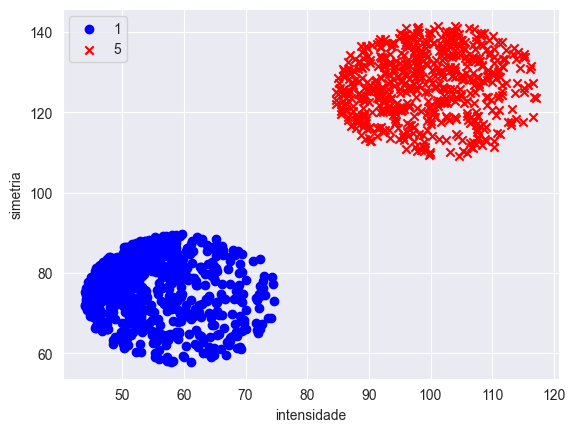

In [7]:
import matplotlib.pyplot as plt

intensity_1 = Reduced_train_1_5[Reduced_train_1_5.label.isin([1])].intensidade
symmetry_1 = Reduced_train_1_5[Reduced_train_1_5.label.isin([1])].simetria

intensity_5 = Reduced_train_1_5[Reduced_train_1_5.label.isin([5])].intensidade
symmetry_5 = Reduced_train_1_5[Reduced_train_1_5.label.isin([5])].simetria

plt.scatter(intensity_1, symmetry_1, color='blue', label='1', marker='o')
plt.scatter(intensity_5, symmetry_5, color='red', label='5', marker='x')

plt.xlabel('intensidade')
plt.ylabel('simetria')

plt.legend()
plt.show()


In [8]:
Reduced_train_1_5.reset_index(drop=True, inplace=True)
Reduced_train_1_5.head()

,label,intensidade,simetria,normalized_i,normalized_s
0,1,44.701961,69.270588,0.006349,0.110503
1,1,59.850980,83.443137,0.138219,0.247928
2,1,48.552941,79.043137,0.039872,0.205263
3,1,69.435294,72.878431,0.221649,0.145486
4,1,51.541176,84.611765,0.065884,0.259259


In [9]:
Reduced_test_1_5.reset_index(drop=True, inplace=True)
Reduced_test_1_5.head()

,label,intensidade,simetria,normalized_i,normalized_s
0,1,51.639216,71.443137,0.066737,0.131569
1,1,51.674510,85.050980,0.067044,0.263518
2,1,44.847059,72.674510,0.007612,0.143509
3,1,50.760784,81.945098,0.059091,0.233402
4,1,57.788235,72.564706,0.120264,0.142444


Construir o vetor 𝑋 = {(𝑖𝑛𝑡𝑒𝑛𝑠𝑖𝑑𝑎𝑑𝑒, 𝑠𝑖𝑚𝑒𝑡𝑟𝑖𝑎)} para toda imagem de train1x5. Atribuir o valor alvo 𝑦 = +1 para a imagem com valor 𝑙𝑎𝑏𝑒𝑙 = 1 e 𝑦 = −1 para 𝑙𝑎𝑏𝑒𝑙 = 5;

In [10]:
import numpy as np

DIGIT_1 = 1
DIGIT_5 = 5

X_reduced_train_1_5 = Reduced_train_1_5[['normalized_i', 'normalized_s']].values
Y_reduced_train_1_5 = np.array([1 if y == DIGIT_1 else -1 for y in Reduced_train_1_5.label])

X_reduced_test_1_5 = Reduced_test_1_5[['normalized_i', 'normalized_s']].values
Y_reduced_test_1_5 = np.array([1 if y == DIGIT_1 else -1 for y in Reduced_test_1_5.label])

Criando o método de predição

In [11]:
import numpy as np
from typing import Union

# Função para prever o dígito com base nos valores de entrada
def predict_digit(labels: Union[np.ndarray, list]) -> np.ndarray:
    """
    Substitui os valores no array de labels:
    - Se o valor for igual a 1, ele permanece 1
    - Se o valor for diferente de 1, ele é substituído por 5

    :param labels: Array ou lista contendo os valores originais de labels
    :return: Um array NumPy onde os valores são 1 ou 5
    """
    # Substitui 1 por 1 e qualquer outro valor por 5
    transformed_labels: np.ndarray = np.where(labels == 1, 1, 5)
    
    # Retorna o array transformado
    return transformed_labels

#### Regressão Linear

In [12]:
from src.linear_regression import LinearRegressionClassifier


Treinando o classificador

In [13]:
# Instanciando o classificador
classifier = LinearRegressionClassifier()

# Treinando o classificador
classifier.train(X_reduced_train_1_5, Y_reduced_train_1_5)

# Predizendo os valores
pred_train = classifier.predict(X_reduced_train_1_5)

predict_digit_linear_regression = predict_digit(np.array(pred_train))
print(f"{predict_digit_linear_regression=}")

predict_digit_linear_regression=array([1, 1, 1, ..., 5, 5, 5])


In [14]:
from src.linear_regression import LinearRegression

linear_regression = LinearRegression()
linear_regression.fit(X_reduced_train_1_5, Y_reduced_train_1_5)

y_pred = np.array(linear_regression.predict(X_reduced_train_1_5))
print(f"{y_pred=}")

weights = linear_regression.get_weights()
print(f"{weights=}")

# Converte as previsões contínuas para classes binárias (1 e 5)
y_pred = np.where(y_pred >= 0, 1, -1)
y_pred = predict_digit(y_pred)
print(f"{y_pred=}")

y_pred=array([ 1.28638583,  0.70299355,  1.00780015, ..., -1.29803172,
       -1.06514216, -1.29508439])
weights=array([ 1.54070954, -2.15454424, -2.17771687])
y_pred=array([1, 1, 1, ..., 5, 5, 5])


Plotando o gráfico

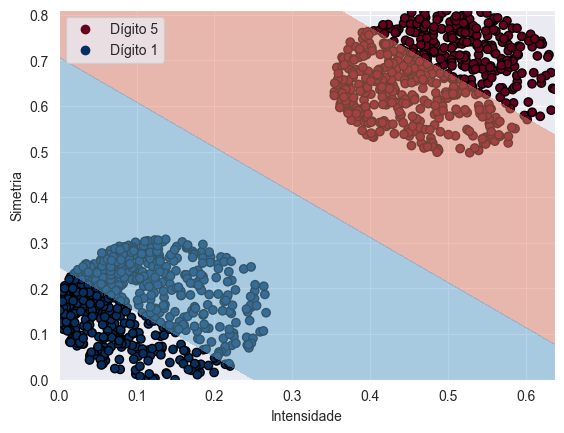

In [15]:
plt.figure()

# Plota os dados reduzidos (características reduzidas para duas dimensões)
# X_reduced_train_1_5 contém as características reduzidas (primeira e segunda colunas)
# Y_reduced_train_1_5 contém os rótulos correspondentes
scatter = plt.scatter(
    X_reduced_train_1_5[:, 0],  # Primeira característica (eixo X)
    X_reduced_train_1_5[:, 1],  # Segunda característica (eixo Y)
    c=Y_reduced_train_1_5,      # Cor dos pontos com base nos rótulos (categorização)
    cmap='RdBu',        # Mapa de cores 'coolwarm' para distinguir as classes
    marker='o',             # Marcadores no formato circular
    edgecolor='k'           # Cor da borda dos marcadores (preto)
)

# Cria uma malha de pontos no espaço bidimensional para fazer predições
xx, yy = np.meshgrid(
    np.linspace(X_reduced_train_1_5[:, 0].min(), X_reduced_train_1_5[:, 0].max(), 500),
    np.linspace(X_reduced_train_1_5[:, 1].min(), X_reduced_train_1_5[:, 1].max(), 500)
)

# Realiza predições utilizando os valores da malha xx, yy
# A malha é convertida em uma lista de coordenadas de pontos (xx.ravel(), yy.ravel()) para predição
Z = np.array(linear_regression.predict(np.c_[xx.ravel(), yy.ravel()]))

# Redimensiona a matriz Z para o formato da malha (xx.shape) para usar no gráfico de contornos
Z = Z.reshape(xx.shape)

# Desenha a fronteira de decisão usando contornos preenchidos
plt.contourf(
    xx, yy, Z, 
    alpha=0.5,        # Transparência do preenchimento
    cmap='RdBu',  # Mapa de cores para a fronteira de decisão
    levels=[-1, 0, 1] # Níveis para os contornos (categorias -1, 0, 1)
)

# Define rótulos dos eixos
plt.xlabel('Intensidade')  # Eixo X
plt.ylabel('Simetria')   # Eixo Y

# Adiciona a legenda ao gráfico
handles, labels = scatter.legend_elements()
plt.legend(handles, ['Dígito 5', 'Dígito 1'])

# Exibe o gráfico
plt.show()

Testando o classificador

In [16]:
predictions_test = classifier.predict(X_reduced_test_1_5)
predictions_test_result = predict_digit(np.array(predictions_test))
print(f"{predictions_test_result=}")

predictions_test_result=array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 5,

Plotando o gráfico do teste

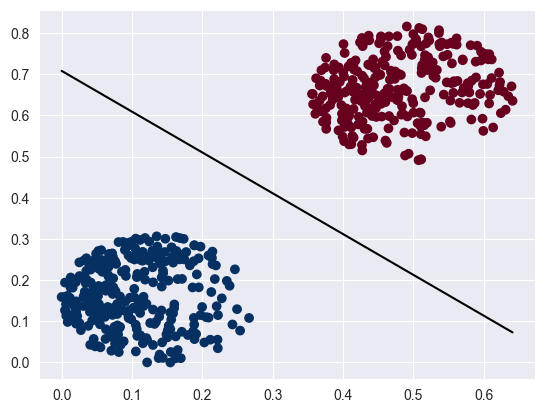

In [17]:
# Plot dos dados de teste com cores baseadas nas classes (y_test1x5)
plt.scatter(X_reduced_test_1_5[:, 0], X_reduced_test_1_5[:, 1], c=Y_reduced_test_1_5, cmap='RdBu')

# Cria uma linha para plotar a fronteira de decisão (100 pontos entre o mínimo e máximo de X_test1x5_rev[:, 0])
x = np.linspace(X_reduced_test_1_5[:, 0].min(), X_reduced_test_1_5[:, 0].max(), 100)

# Obtém os valores de y correspondentes à fronteira de decisão usando os pesos do classificador
y = classifier.get_decision_boundary(x)

# Plota a linha de regressão linear, que representa a fronteira de decisão
plt.plot(x, y, color='black')

# Exibe o gráfico final
plt.show()

In [18]:
from src.metric import compute_error

# Computing in-sample error (Ein)
eIn: float = compute_error(y_pred, Reduced_train_1_5)
print(f"{eIn=}")

# Computing out-of-sample error (Eout)
eOut: float = compute_error(predictions_test_result, Reduced_test_1_5)
print(f"{eOut=}")

eIn=0.0
eOut=0.0


Gerar a matriz de confusão e os relatórios de eficácia de classificação

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       608
           5       1.00      1.00      1.00       576

    accuracy                           1.00      1184
   macro avg       1.00      1.00      1.00      1184
weighted avg       1.00      1.00      1.00      1184

linear_regression_conf_matrix_train=array([[608,   0],
       [  0, 576]])


<Axes: >

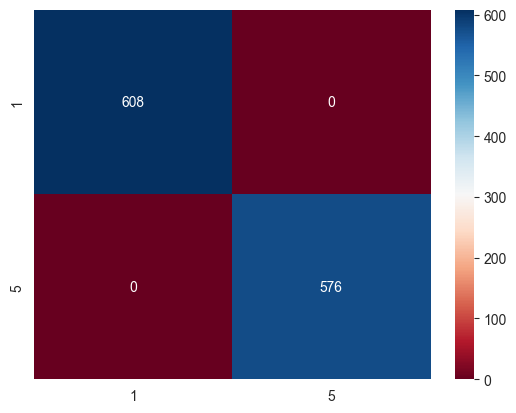

In [19]:
from sklearn.metrics import classification_report, confusion_matrix 
import seaborn as sns

# Relatório de eficácia de classificação
linear_regression_classification_report_train = classification_report(Reduced_train_1_5.label, y_pred)
print(f"{linear_regression_classification_report_train}")

# Matriz de confusão
linear_regression_conf_matrix_train = confusion_matrix(Reduced_train_1_5.label, y_pred)
print(f"{linear_regression_conf_matrix_train=}")

sns.heatmap(linear_regression_conf_matrix_train, annot=True, fmt='d', cmap='RdBu', xticklabels=[1, 5], yticklabels=[1, 5])

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       292
           5       1.00      1.00      1.00       291

    accuracy                           1.00       583
   macro avg       1.00      1.00      1.00       583
weighted avg       1.00      1.00      1.00       583

linear_regression_conf_matrix_test=array([[292,   0],
       [  0, 291]])


<Axes: >

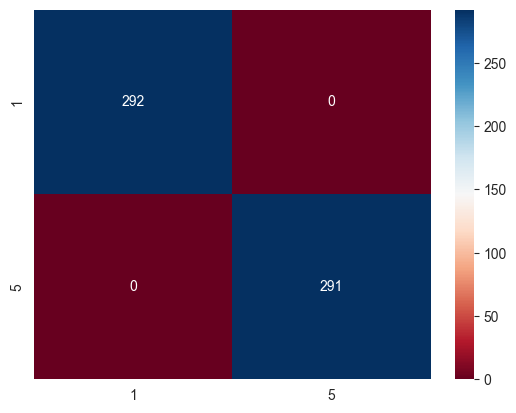

In [20]:
linear_regression_classification_report_test = classification_report(Reduced_test_1_5.label, predictions_test_result)
print(f"{linear_regression_classification_report_test}")

# Matriz de confusão
linear_regression_conf_matrix_test = confusion_matrix(Reduced_test_1_5.label, predictions_test_result)
print(f"{linear_regression_conf_matrix_test=}")

sns.heatmap(linear_regression_conf_matrix_test, annot=True, fmt='d', cmap='RdBu', xticklabels=[1, 5], yticklabels=[1, 5])

#### Perceptron

In [21]:
from src.perceptron import PocketPLA

# Instanciando o classificador
pocket_pla = PocketPLA()


Treinando o classificador

In [22]:
# adicionando coluna de bias
X_reduced_train_1_5_pla = np.column_stack((np.ones((len(X_reduced_train_1_5), 1)), X_reduced_train_1_5))

# Treinando o classificador
pocket_pla.execute(X_reduced_train_1_5_pla, Y_reduced_train_1_5)

# Predizendo os valores
from src.perceptron import pocket_pla_prediction

pred_train_pla = pocket_pla_prediction(pocket_pla, X_reduced_train_1_5_pla)
print(f"{pred_train_pla=}")

pred_train_pla=array([1, 1, 1, ..., 5, 5, 5])


In [23]:
weights_pla = pocket_pla.get_weights()
print(f"{weights_pla=}")

weights_pla=array([ 1.        , -1.38233085, -1.39531523])


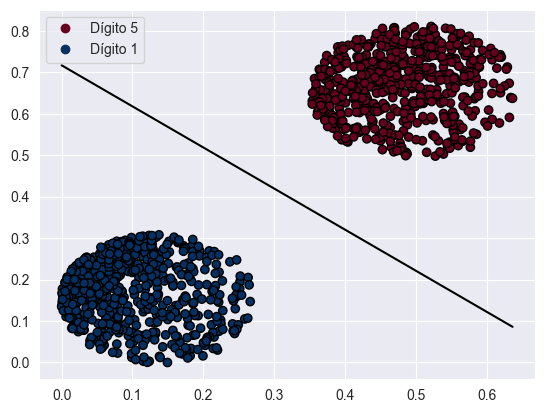

In [24]:
# Plotando o gráfico

plt.figure()

# Plota os dados reduzidos (características reduzidas para duas dimensões)
scatter = plt.scatter(
    X_reduced_train_1_5_pla[:, 1],  # Primeira característica (eixo X)
    X_reduced_train_1_5_pla[:, 2],  # Segunda característica (eixo Y)
    c=Y_reduced_train_1_5,      # Cor dos pontos com base nos rótulos (categorização)
    cmap='RdBu',        # Mapa de cores 'coolwarm' para distinguir as classes
    marker='o',             # Marcadores no formato circular
    edgecolor='k'           # Cor da borda dos marcadores (preto)
)

x = np.linspace(X_reduced_train_1_5_pla[:, 1].min(), X_reduced_train_1_5_pla[:, 1].max(), 100)

# Obtém os valores de y correspondentes à fronteira de decisão usando os pesos do classificador
y = pocket_pla.get_original_y(x)

plt.plot(x, y, color='black')
handles, labels = scatter.legend_elements()
plt.legend(handles, ['Dígito 5', 'Dígito 1'])
plt.show()

Testando o classificador

In [25]:
# adicionando coluna de bias
X_reduced_test_1_5_pla = np.column_stack((np.ones((len(X_reduced_test_1_5), 1)), X_reduced_test_1_5))

# Predizendo os valores
pred_test_pla = pocket_pla_prediction(pocket_pla, X_reduced_test_1_5_pla)
print(f"{pred_test_pla=}")

pred_test_pla=array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 5, 5, 5, 5, 

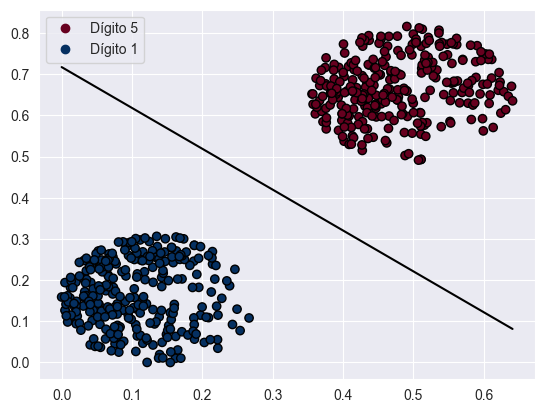

In [26]:
# Plotando o gráfico

plt.figure()

# Plota os dados reduzidos (características reduzidas para duas dimensões)
scatter = plt.scatter(
    X_reduced_test_1_5_pla[:, 1],  # Primeira característica (eixo X)
    X_reduced_test_1_5_pla[:, 2],  # Segunda característica (eixo Y)
    c=Y_reduced_test_1_5,      # Cor dos pontos com base nos rótulos (categorização)
    cmap='RdBu',        # Mapa de cores 'coolwarm' para distinguir as classes
    marker='o',             # Marcadores no formato circular
    edgecolor='k'           # Cor da borda dos marcadores (preto)
)

x = np.linspace(X_reduced_test_1_5_pla[:, 1].min(), X_reduced_test_1_5_pla[:, 1].max(), 100)

# Obtém os valores de y correspondentes à fronteira de decisão usando os pesos do classificador
y = pocket_pla.get_original_y(x)

plt.plot(x, y, color='black')
handles, labels = scatter.legend_elements()
plt.legend(handles, ['Dígito 5', 'Dígito 1'])
plt.show()

In [27]:
# Computing in-sample error (Ein)
eIn_pla: float = compute_error(pred_train_pla, Reduced_train_1_5)
print(f"{eIn_pla=}")

# Computing out-of-sample error (Eout)
eOut_pla: float = compute_error(pred_test_pla, Reduced_test_1_5)
print(f"{eOut_pla=}")

eIn_pla=0.0
eOut_pla=0.0


Gerar a matriz de confusão e os relatórios de eficácia de classificação

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       608
           5       1.00      1.00      1.00       576

    accuracy                           1.00      1184
   macro avg       1.00      1.00      1.00      1184
weighted avg       1.00      1.00      1.00      1184

perceptron_conf_matrix_train=array([[608,   0],
       [  0, 576]])


<Axes: >

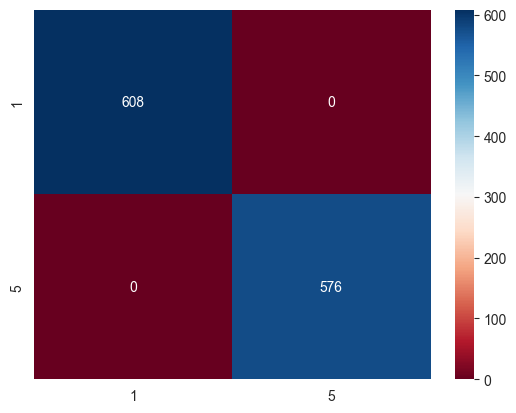

In [28]:
# Relatório de eficácia de classificação
perceptron_classification_report_train = classification_report(Reduced_train_1_5.label, pred_train_pla)
print(f"{perceptron_classification_report_train}")

# Matriz de confusão
perceptron_conf_matrix_train = confusion_matrix(Reduced_train_1_5.label, pred_train_pla)
print(f"{perceptron_conf_matrix_train=}")

sns.heatmap(perceptron_conf_matrix_train, annot=True, fmt='d', cmap='RdBu', xticklabels=[1, 5], yticklabels=[1, 5])

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       292
           5       1.00      1.00      1.00       291

    accuracy                           1.00       583
   macro avg       1.00      1.00      1.00       583
weighted avg       1.00      1.00      1.00       583

perceptron_conf_matrix_test=array([[292,   0],
       [  0, 291]])


<Axes: >

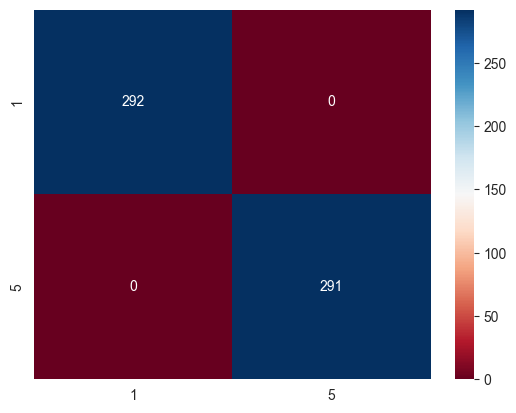

In [29]:
perceptron_classification_report_test = classification_report(Reduced_test_1_5.label, pred_test_pla)
print(f"{perceptron_classification_report_test}")

# Matriz de confusão
perceptron_conf_matrix_test = confusion_matrix(Reduced_test_1_5.label, pred_test_pla)
print(f"{perceptron_conf_matrix_test=}")

sns.heatmap(perceptron_conf_matrix_test, annot=True, fmt='d', cmap='RdBu', xticklabels=[1, 5], yticklabels=[1, 5])

#### Regressão Logística

In [30]:
from src.logistic_regression import LogisticRegression

# Instanciando o classificador
logistic_regression = LogisticRegression(max_iterations=2000)

Treinando o classificador

In [31]:
# adicionando coluna de bias
X_reduced_train_1_5_logistic = np.column_stack((np.ones((len(X_reduced_train_1_5), 1)), X_reduced_train_1_5))

# Treinando o classificador
logistic_regression.train(X_reduced_train_1_5_logistic, Y_reduced_train_1_5)

# Predizendo os valores
y_pred_logistic = logistic_regression.predict_probabilities(X_reduced_train_1_5_logistic)
print(f"{y_pred_logistic=}")

# Converte as previsões contínuas para classes binárias (1 e 5)
y_pred_logistic_binary = logistic_regression.predict_classes(X_reduced_train_1_5_logistic)
print(f"{y_pred_logistic_binary=}")

y_pred_logistic=array([0.96759154, 0.85913134, 0.93076633, ..., 0.0252737 , 0.04390058,
       0.02287046])
y_pred_logistic_binary=array([ 1,  1,  1, ..., -1, -1, -1])


Plotando o gráfico

/Users/jusbrasil/Library/Caches/pypoetry/virtualenvs/ml-digit-at-ufpb-7uyM1Yaq-py3.9/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


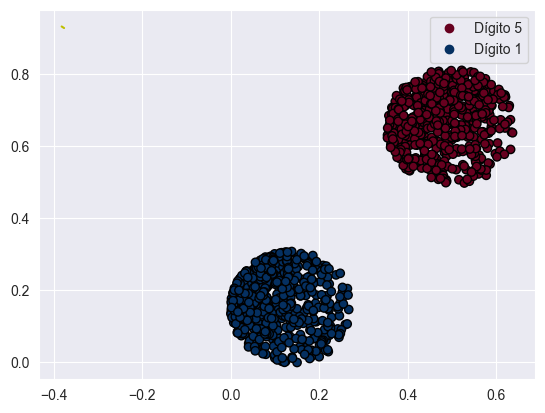

In [32]:
# Definindo os limites mínimo e máximo da primeira coluna do conjunto de treino reduzido
x_min_value = X_reduced_train_1_5_logistic[:, 1].min()
x_max_value = X_reduced_train_1_5_logistic[:, 1].max()

# Gerando 100 valores de x igualmente espaçados entre x_min_value e x_max_value
x_range_values = np.linspace(x_min_value, x_max_value, 100)

# Normalizando os valores de x usando o scaler (a segunda coluna é zero para manter a consistência dimensional)
x_normalized_values = scaler.transform(np.column_stack((x_range_values, np.zeros_like(x_range_values))))[:, 0]

# Calculando os valores de y correspondentes usando a fronteira de decisão do classificador
y_decision_boundary_values = [logistic_regression.calculate_decision_boundary_y(x_normalized) for x_normalized in x_normalized_values]

# Plota os dados reduzidos (características reduzidas para duas dimensões)
scatter = plt.scatter(
    X_reduced_train_1_5_logistic[:, 1],  # Primeira característica (eixo X)
    X_reduced_train_1_5_logistic[:, 2],  # Segunda característica (eixo Y)
    c=Y_reduced_train_1_5,      # Cor dos pontos com base nos rótulos (categorização)
    cmap='RdBu',        # Mapa de cores 'coolwarm' para distinguir as classes
    marker='o',             # Marcadores no formato circular
    edgecolor='k'           # Cor da borda dos marcadores (preto)
)
  
plt.plot(x_normalized_values, y_decision_boundary_values, 'y-', label='g(.)')
handles, labels = scatter.legend_elements()
plt.legend(handles, ['Dígito 5', 'Dígito 1'])
plt.show()

Testando o classificador

In [33]:
X_reduced_test_1_5_logistic = np.column_stack((np.ones((len(X_reduced_test_1_5), 1)), X_reduced_test_1_5))

# Predizendo os valores
y_pred_test_logistic = logistic_regression.predict_probabilities(X_reduced_test_1_5_logistic)
print(f"{y_pred_test_logistic=}")

# Converte as previsões contínuas para classes binárias (1 e 5)
y_pred_test_logistic_binary = logistic_regression.predict_classes(X_reduced_test_1_5_logistic)
print(f"{y_pred_test_logistic_binary=}")

y_pred_test_logistic=array([0.95001958, 0.88835213, 0.95978284, 0.909998  , 0.93060264,
       0.95303875, 0.86056585, 0.83506619, 0.9750647 , 0.95981496,
       0.90686743, 0.89075295, 0.93451228, 0.94819431, 0.96478283,
       0.92937821, 0.92032857, 0.91516036, 0.85587187, 0.82718257,
       0.92492089, 0.93789541, 0.95909552, 0.96321277, 0.82202283,
       0.8366666 , 0.95707452, 0.83197701, 0.94160932, 0.96951484,
       0.84038092, 0.81358073, 0.88709133, 0.94793689, 0.95057037,
       0.94573107, 0.87590169, 0.93494792, 0.92920579, 0.9099972 ,
       0.96670612, 0.90349979, 0.92933764, 0.84591772, 0.91328428,
       0.81970804, 0.95996826, 0.9464649 , 0.96762039, 0.96462008,
       0.90246869, 0.9554857 , 0.91402795, 0.9417282 , 0.89154609,
       0.95034902, 0.93620815, 0.96749652, 0.93752728, 0.96107954,
       0.8710012 , 0.94967434, 0.87714505, 0.96968105, 0.93999089,
       0.93996183, 0.93627013, 0.92216094, 0.90201239, 0.95932163,
       0.80873759, 0.93382567, 0.95310144

Plotando o gráfico

/Users/jusbrasil/Library/Caches/pypoetry/virtualenvs/ml-digit-at-ufpb-7uyM1Yaq-py3.9/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


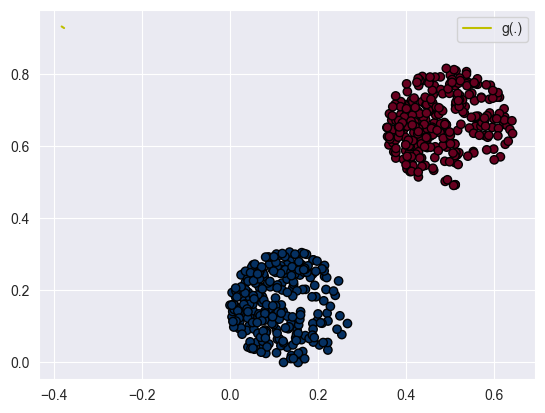

In [34]:
# Plotando o gráfico

plt.figure()

x_min_value = X_reduced_test_1_5_logistic[:, 1].min()
x_max_value = X_reduced_test_1_5_logistic[:, 1].max()

# Gerando 100 valores de x igualmente espaçados entre x_min_value e x_max_value
x_range_values = np.linspace(x_min_value, x_max_value, 100)

# Normalizando os valores de x usando o scaler (a segunda coluna é zero para manter a consistência dimensional)
x_normalized_values = scaler.transform(np.column_stack((x_range_values, np.zeros_like(x_range_values))))[:, 0]

# Calculando os valores de y correspondentes usando a fronteira de decisão do classificador
y_decision_boundary_values = [logistic_regression.calculate_decision_boundary_y(x_normalized) for x_normalized in x_normalized_values]

# Plota os dados reduzidos (características reduzidas para duas dimensões)
scatter = plt.scatter(
    X_reduced_test_1_5_logistic[:, 1],  # Primeira característica (eixo X)
    X_reduced_test_1_5_logistic[:, 2],  # Segunda característica (eixo Y)
    c=Y_reduced_test_1_5,      # Cor dos pontos com base nos rótulos (categorização)
    cmap='RdBu',        # Mapa de cores 'coolwarm' para distinguir as classes
    marker='o',             # Marcadores no formato circular
    edgecolor='k'           # Cor da borda dos marcadores (preto)
)

plt.plot(x_normalized_values, y_decision_boundary_values, 'y-', label='g(.)')
plt.legend(loc='upper right')
plt.show()

Computando o erro

In [35]:
# Computing in-sample error (Ein)
eIn_logistic: float = compute_error(y_pred_logistic_binary, Y_reduced_train_1_5, label_column="")
print(f"{eIn_logistic=}")

# Computing out-of-sample error (Eout)
eOut_logistic: float = compute_error(y_pred_test_logistic_binary, Y_reduced_test_1_5, label_column="")
print(f"{eOut_logistic=}")

eIn_logistic=0.0
eOut_logistic=0.0


Gerar a matriz de confusão e os relatórios de eficácia de classificação

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00       576
           1       1.00      1.00      1.00       608

    accuracy                           1.00      1184
   macro avg       1.00      1.00      1.00      1184
weighted avg       1.00      1.00      1.00      1184

logistic_regression_conf_matrix_train=array([[576,   0],
       [  0, 608]])


<Axes: >

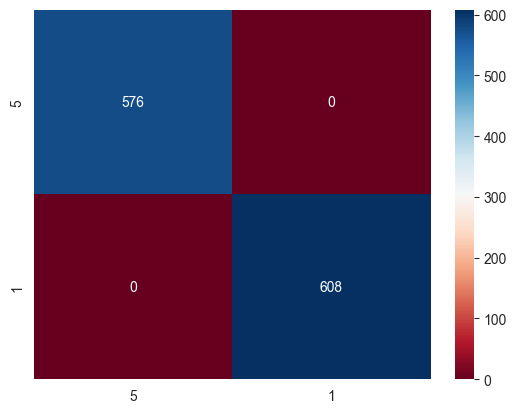

In [36]:
# Relatório de eficácia de classificação
logistic_regression_classification_report_train = classification_report(Y_reduced_train_1_5.tolist(), y_pred_logistic_binary)
print(f"{logistic_regression_classification_report_train}")

# Matriz de confusão
logistic_regression_conf_matrix_train = confusion_matrix(Y_reduced_train_1_5.tolist(), y_pred_logistic_binary)
print(f"{logistic_regression_conf_matrix_train=}")

sns.heatmap(logistic_regression_conf_matrix_train, annot=True, fmt='d', cmap='RdBu', xticklabels=[5, 1], yticklabels=[5, 1])

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00       291
           1       1.00      1.00      1.00       292

    accuracy                           1.00       583
   macro avg       1.00      1.00      1.00       583
weighted avg       1.00      1.00      1.00       583

logistic_regression_conf_matrix_test=array([[291,   0],
       [  0, 292]])


<Axes: >

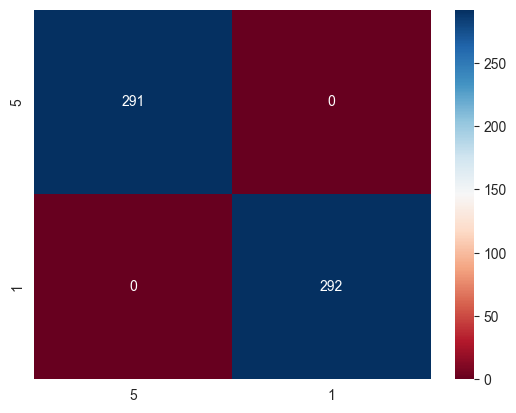

In [37]:
# Relatório de eficácia de classificação
logistic_regression_classification_report_test = classification_report(Y_reduced_test_1_5.tolist(), y_pred_test_logistic_binary)
print(f"{logistic_regression_classification_report_test}")

# Matriz de confusão
logistic_regression_conf_matrix_test = confusion_matrix(Y_reduced_test_1_5.tolist(), y_pred_test_logistic_binary)
print(f"{logistic_regression_conf_matrix_test=}")

sns.heatmap(logistic_regression_conf_matrix_test, annot=True, fmt='d', cmap='RdBu', xticklabels=[5, 1], yticklabels=[5, 1])

### Conclusão na classificação dos dígitos 1 e 5

Os classificadores Perceptron, Regressão Linear e Regressão Logística foram implementados e treinados com o dataset MNIST Adaptado. A partir dos resultados obtidos, foi possível observar que os classificadores apresentaram desempenho satisfatório na classificação dos dígitos 1 e 5.

O classificador Perceptron obteve um erro de classificação de 0.0% para o conjunto de treino e 0.0% para o conjunto de teste. O classificador Regressão Linear obteve um erro de classificação de 0.0% para o conjunto de treino e 0.0% para o conjunto de teste. O classificador Regressão Logística obteve um erro de classificação de 0.0% para o conjunto de treino e 0.0% para o conjunto de teste.

Os resultados obtidos demonstram que os classificadores implementados foram capazes de aprender a fronteira de decisão entre os dígitos 1 e 5, obtendo uma classificação precisa para ambos os conjuntos de dados. Portanto, os classificadores Perceptron, Regressão Linear e Regressão Logística são eficazes na classificação dos dígitos 1 e 5 do dataset MNIST Adaptado.

### Classificador de dígitos completo

In [38]:
# Carregando os dados reduzidos
DIGIT_0 = 0

X_reduced_train_digit_0 = Reduced_train[['intensidade', 'simetria']].values
Y_reduced_train_digit_0 = np.array([1 if y_ == DIGIT_0 else -1 for y_ in Reduced_train.label])

X_reduced_test_digit_0 = Reduced_test[['intensidade', 'simetria']].values
Y_reduced_test_digit_0 = np.array([1 if y_ == DIGIT_0 else -1 for y_ in Reduced_test.label])

#### Regressão Linear

In [39]:
classifier_digit_0 = LinearRegressionClassifier()

# Treinando o classificador
classifier_digit_0.train(X_reduced_train_digit_0, Y_reduced_train_digit_0)

# Predizendo os valores
pred_train = classifier_digit_0.predict(X_reduced_train_digit_0)

predict_digit_linear_regression = predict_digit(np.array(pred_train))
print(f"{predict_digit_linear_regression=}")

linear_regression = LinearRegression()
linear_regression.fit(X_reduced_train_digit_0, Y_reduced_train_digit_0)

y_pred_digit_0 = np.array(linear_regression.predict(X_reduced_train_digit_0))
print(f"{y_pred_digit_0=}")

weights = linear_regression.get_weights()
print(f"{weights=}")

# Converte as previsões contínuas para classes binárias (0 e todos)
y_pred_digit_0 = np.where(y_pred_digit_0 >= 0, 1, -1)
print(f"{y_pred_digit_0=}")

predict_digit_linear_regression=array([1, 5, 1, ..., 5, 5, 5])
y_pred_digit_0=array([ 0.46838962, -0.13831476,  0.11182878, ..., -0.31067141,
       -0.59531426, -0.60963207])
weights=array([-2.23739689,  0.0254455 , -0.0066963 ])
y_pred_digit_0=array([ 1, -1,  1, ..., -1, -1, -1])


Plotando o gráfico

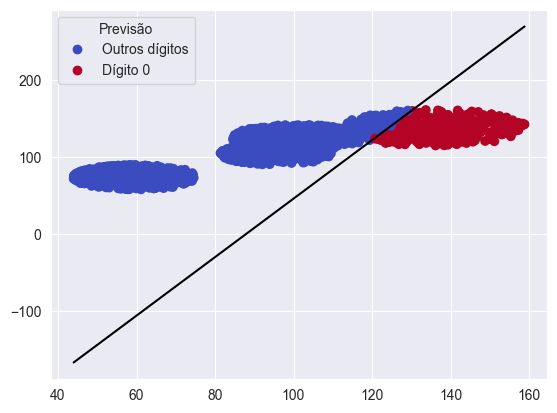

In [40]:
scatter = plt.scatter(X_reduced_train_digit_0[:, 0], X_reduced_train_digit_0[:, 1], c=y_pred_digit_0, cmap='coolwarm')

x = np.linspace(X_reduced_train_digit_0[:, 0].min(), X_reduced_train_digit_0[:, 0].max(), 100)
y = classifier_digit_0.get_decision_boundary(x)

plt.plot(x, y, color='black')
handles, labels = scatter.legend_elements()
plt.legend(handles, ['Outros dígitos', 'Dígito 0'], title='Previsão')
plt.show()

In [41]:
Reduced_train_digit_without_0 = Reduced_train[y_pred_digit_0 == -1]

X_reduced_train_digit_1 = Reduced_train_digit_without_0[["intensidade", "simetria"]].values
Y_reduced_train_digit_1 = np.array([1 if y_ == DIGIT_1 else -1 for y_ in Reduced_train_digit_without_0['label']])

In [42]:
classifier_digit_1 = LinearRegressionClassifier()

# Treinando o classificador
classifier_digit_1.train(X_reduced_train_digit_1, Y_reduced_train_digit_1)

# Predizendo os valores
pred_train = classifier_digit_1.predict(X_reduced_train_digit_1)

predict_digit_linear_regression = predict_digit(np.array(pred_train))
print(f"{predict_digit_linear_regression=}")

linear_regression = LinearRegression()
linear_regression.fit(X_reduced_train_digit_1, Y_reduced_train_digit_1)

y_pred_digit_1 = np.array(linear_regression.predict(X_reduced_train_digit_1))
print(f"{y_pred_digit_1=}")

weights = linear_regression.get_weights()
print(f"{weights=}")

# Converte as previsões contínuas para classes binárias (0 e todos)
y_pred_digit_1 = np.where(y_pred_digit_1 >= 0, 1, -1)
print(f"{y_pred_digit_1=}")

predict_digit_linear_regression=array([5, 5, 5, ..., 5, 5, 5])
y_pred_digit_1=array([-1.66281447, -2.13268212, -2.07740457, ..., -1.39013978,
       -1.03904214, -1.17803388])
weights=array([ 3.13153492, -0.03004819, -0.00898044])
y_pred_digit_1=array([-1, -1, -1, ..., -1, -1, -1])


Plotando o gráfico

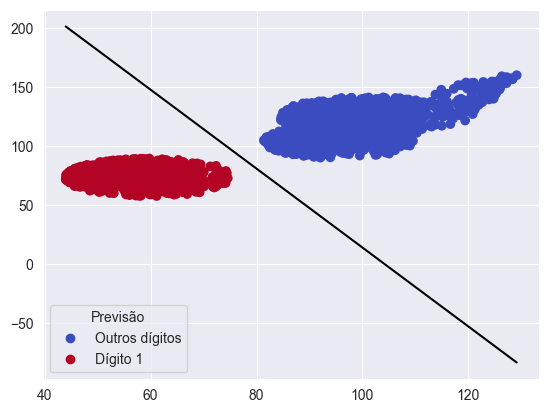

In [43]:
scatter = plt.scatter(X_reduced_train_digit_1[:, 0], X_reduced_train_digit_1[:, 1], c=y_pred_digit_1, cmap='coolwarm')

x = np.linspace(X_reduced_train_digit_1[:, 0].min(), X_reduced_train_digit_1[:, 0].max(), 100)
y = classifier_digit_1.get_decision_boundary(x)

plt.plot(x, y, color='black')
handles, labels = scatter.legend_elements()
plt.legend(handles, ['Outros dígitos', 'Dígito 1'], title='Previsão')
plt.show()

In [44]:
DIGIT_4 = 4

Reduced_train_digit_without_1 = Reduced_train_digit_without_0[y_pred_digit_1 == -1]

X_reduced_train_digit_4 = Reduced_train_digit_without_1[["intensidade", "simetria"]].values
Y_reduced_train_digit_4 = np.array([1 if y_ == DIGIT_4 else -1 for y_ in Reduced_train_digit_without_1.label])

In [45]:
classifier_digit_4 = LinearRegressionClassifier()

# Treinando o classificador
classifier_digit_4.train(X_reduced_train_digit_4, Y_reduced_train_digit_4)

# Predizendo os valores
pred_train = classifier_digit_4.predict(X_reduced_train_digit_4)

predict_digit_linear_regression = predict_digit(np.array(pred_train))
print(f"{predict_digit_linear_regression=}")

linear_regression = LinearRegression()
linear_regression.fit(X_reduced_train_digit_4, Y_reduced_train_digit_4)

y_pred_digit_4 = np.array(linear_regression.predict(X_reduced_train_digit_4))
print(f"{y_pred_digit_4=}")

weights = linear_regression.get_weights()
print(f"{weights=}")

# Converte as previsões contínuas para classes binárias (0 e todos)
y_pred_digit_4 = np.where(y_pred_digit_4 >= 0, 1, -1)
print(f"{y_pred_digit_4=}")

predict_digit_linear_regression=array([5, 5, 5, ..., 5, 5, 5])
y_pred_digit_4=array([-1.03511228, -2.15009276, -1.97878648, ..., -0.84898855,
       -0.86760293, -1.38323983])
weights=array([ 6.07307683e+00,  6.06019786e-03, -5.70824398e-02])
y_pred_digit_4=array([-1, -1, -1, ..., -1, -1, -1])


Plotando o gráfico

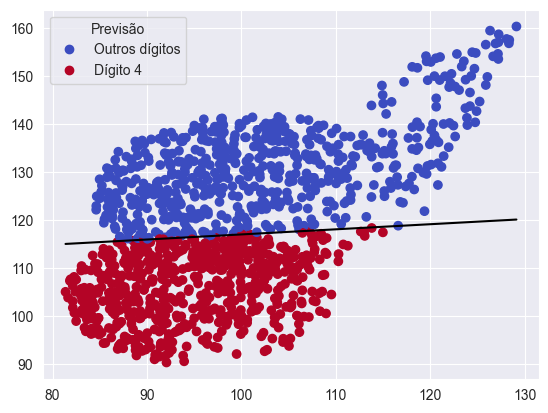

In [46]:
scatter = plt.scatter(X_reduced_train_digit_4[:, 0], X_reduced_train_digit_4[:, 1], c=y_pred_digit_4, cmap='coolwarm')

x = np.linspace(X_reduced_train_digit_4[:, 0].min(), X_reduced_train_digit_4[:, 0].max(), 100)
y = classifier_digit_4.get_decision_boundary(x)

plt.plot(x, y, color='black')
handles, labels = scatter.legend_elements()
plt.legend(handles, ['Outros dígitos', 'Dígito 4'], title='Previsão')
plt.show()

              precision    recall  f1-score   support

           0       1.00      0.76      0.86       425
           1       1.00      1.00      1.00       608
           4       0.88      0.97      0.92       577
           5       0.81      0.87      0.84       576

    accuracy                           0.91      2186
   macro avg       0.92      0.90      0.91      2186
weighted avg       0.92      0.91      0.91      2186



<Axes: >

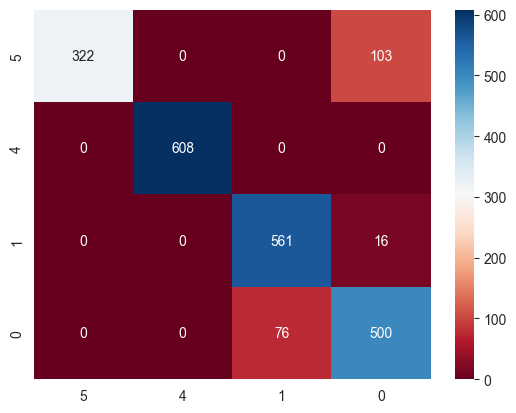

In [47]:
from src.classifier import DigitClassifier

# Instanciando o classificador
digit_classifier = DigitClassifier(classifier_digit_0, classifier_digit_1, classifier_digit_4)

feature_data = Reduced_train[['intensidade', 'simetria']].values
classified_train = [digit_classifier.classify_digit(imagem.reshape(1, -1)) for imagem in feature_data]

# Relatório de eficácia de classificação
linear_regression_classification_report_train = classification_report(Reduced_train.label.tolist(), classified_train)
print(f"{linear_regression_classification_report_train}")

# Matriz de confusão
linear_regression_conf_matrix_train = confusion_matrix(Reduced_train.label.tolist(), classified_train)
linear_regression_conf_matrix_train

sns.heatmap(linear_regression_conf_matrix_train, annot=True, fmt='d', cmap='RdBu', xticklabels=[5, 4, 1, 0], yticklabels=[5, 4, 1, 0])

              precision    recall  f1-score   support

           0       1.00      0.80      0.89       218
           1       1.00      1.00      1.00       292
           4       0.92      0.99      0.95       314
           5       0.85      0.91      0.88       291

    accuracy                           0.93      1115
   macro avg       0.94      0.92      0.93      1115
weighted avg       0.94      0.93      0.93      1115



<Axes: >

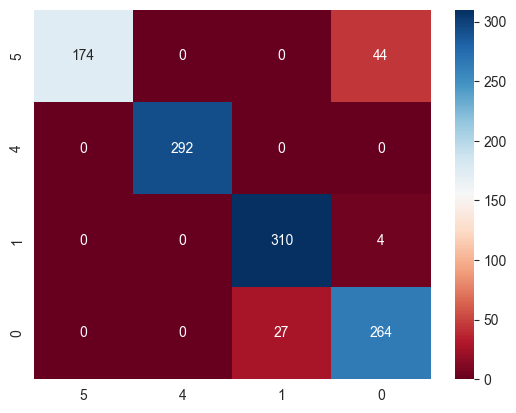

In [48]:
feature_data = Reduced_test[['intensidade', 'simetria']].values
classified_test = [digit_classifier.classify_digit(imagem.reshape(1, -1)) for imagem in feature_data]

# Relatório de eficácia de classificação
linear_regression_classification_report_test = classification_report(Reduced_test.label.tolist(), classified_test)
print(f"{linear_regression_classification_report_test}")

# Matriz de confusão
linear_regression_conf_matrix_test = confusion_matrix(Reduced_test.label.tolist(), classified_test)
linear_regression_conf_matrix_test

sns.heatmap(linear_regression_conf_matrix_test, annot=True, fmt='d', cmap='RdBu', xticklabels=[5, 4, 1, 0], yticklabels=[5, 4, 1, 0])

In [49]:
predictions_dict = {
    'train': classified_train,
    'test': classified_test,
}

import json
from src.constants import PATH_LINEAR_REGRESSION_METRICS_JSON

with open(PATH_LINEAR_REGRESSION_METRICS_JSON, 'w') as json_file:
    json.dump(predictions_dict, json_file)

In [50]:
ein = compute_error(classified_train, Reduced_train)
eout = compute_error(classified_test, Reduced_test)

print(f"{ein=}")
print(f"{eout=}")

ein=0.08920402561756634
eout=0.06726457399103139


### Perceptron

In [51]:
pocket_pla_digit_0 = PocketPLA()

In [52]:
# adicionando coluna de bias
X_reduced_pla_train_digit_0 = np.column_stack((np.ones((len(Reduced_train), 1)), Reduced_train[['normalized_i', 'normalized_s']].values))
Y_reduced_pla_train_digit_0 = np.array([1 if y_ == DIGIT_0 else -1 for y_ in Reduced_train.label])

# Treinando o classificador
pocket_pla_digit_0.execute(X_reduced_pla_train_digit_0, Y_reduced_pla_train_digit_0)

# Predizendo os valores
#from src.perceptron import pocket_pla_prediction

pred_pla_train_digit_0 = pocket_pla_prediction(pocket_pla_digit_0, X_reduced_pla_train_digit_0)
print(f"{pred_pla_train_digit_0=}")

pred_pla_train_digit_0=array([1, 1, 1, ..., 5, 5, 5])


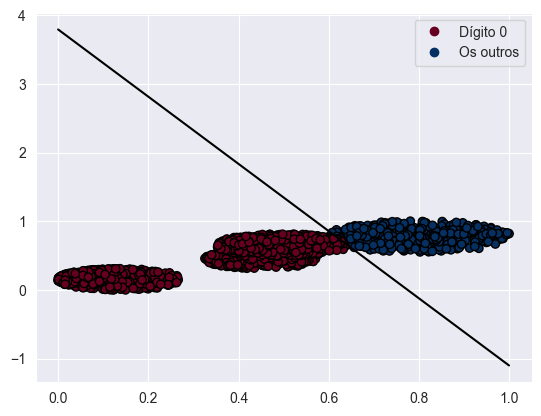

In [53]:
plt.figure()

# Plota os dados reduzidos (características reduzidas para duas dimensões)
scatter = plt.scatter(
    X_reduced_pla_train_digit_0[:, 1],  # Primeira característica (eixo X)
    X_reduced_pla_train_digit_0[:, 2],  # Segunda característica (eixo Y)
    c=Y_reduced_pla_train_digit_0,      # Cor dos pontos com base nos rótulos (categorização)
    cmap='RdBu',        # Mapa de cores 'coolwarm' para distinguir as classes
    marker='o',             # Marcadores no formato circular
    edgecolor='k'           # Cor da borda dos marcadores (preto)
)

x = np.linspace(X_reduced_pla_train_digit_0[:, 1].min(), X_reduced_pla_train_digit_0[:, 1].max(), 100)

# Obtém os valores de y correspondentes à fronteira de decisão usando os pesos do classificador
y = pocket_pla_digit_0.get_original_y(x)

plt.plot(x, y, color='black')
handles, labels = scatter.legend_elements()
plt.legend(handles, ['Dígito 0', 'Os outros'])
plt.show()

pred_pla_train_digit_1=array([1, 1, 1, ..., 5, 5, 5])


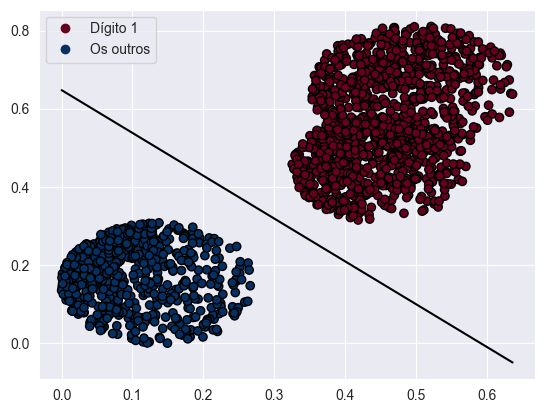

In [54]:
Reduced_train_digit_without_0 = Reduced_train[Y_reduced_pla_train_digit_0 == -1]

X_reduced_pla_train_digit_1 = np.column_stack((np.ones((len(Reduced_train_digit_without_0), 1)), Reduced_train_digit_without_0[['normalized_i', 'normalized_s']].values))
Y_reduced_pla_train_digit_1 = np.array([1 if y_ == DIGIT_1 else -1 for y_ in Reduced_train_digit_without_0.label])

# Treinando o classificador
pocket_pla_digit_1 = PocketPLA()
pocket_pla_digit_1.execute(X_reduced_pla_train_digit_1, Y_reduced_pla_train_digit_1)

pred_pla_train_digit_1 = pocket_pla_prediction(pocket_pla_digit_1, X_reduced_pla_train_digit_1)
print(f"{pred_pla_train_digit_1=}")

# Plotando o gráfico
plt.figure()

# Plota os dados reduzidos (características reduzidas para duas dimensões)
scatter = plt.scatter(
    X_reduced_pla_train_digit_1[:, 1],  # Primeira característica (eixo X)
    X_reduced_pla_train_digit_1[:, 2],  # Segunda característica (eixo Y)
    c=Y_reduced_pla_train_digit_1,      # Cor dos pontos com base nos rótulos (categorização)
    cmap='RdBu',        # Mapa de cores 'coolwarm' para distinguir as classes
    marker='o',             # Marcadores no formato circular
    edgecolor='k'           # Cor da borda dos marcadores (preto)
)

x = np.linspace(X_reduced_pla_train_digit_1[:, 1].min(), X_reduced_pla_train_digit_1[:, 1].max(), 100)

# Obtém os valores de y correspondentes à fronteira de decisão usando os pesos do classificador
y = pocket_pla_digit_1.get_original_y(x)

plt.plot(x, y, color='black')
handles, labels = scatter.legend_elements()
plt.legend(handles, ['Dígito 1', 'Os outros'])
plt.show()


pred_pla_train_digit_4=array([1, 1, 1, ..., 5, 5, 5])


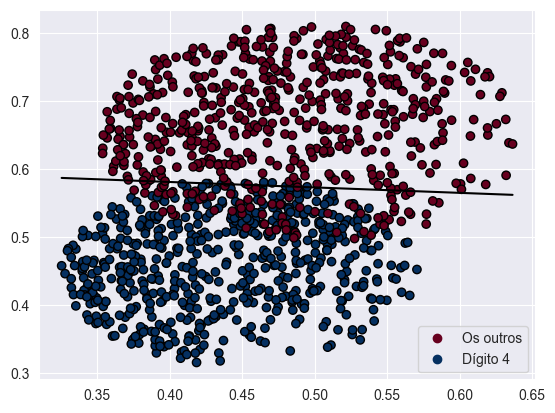

In [55]:
Reduced_train_digit_without_1 = Reduced_train_digit_without_0[Y_reduced_pla_train_digit_1 == -1]

X_reduced_pla_train_digit_4 = np.column_stack((np.ones((len(Reduced_train_digit_without_1), 1)), Reduced_train_digit_without_1[['normalized_i', 'normalized_s']].values))
Y_reduced_pla_train_digit_4 = np.array([1 if y_ == DIGIT_4 else -1 for y_ in Reduced_train_digit_without_1.label])

# Treinando o classificador
pocket_pla_digit_4 = PocketPLA()
pocket_pla_digit_4.execute(X_reduced_pla_train_digit_4, Y_reduced_pla_train_digit_4)

pred_pla_train_digit_4 = pocket_pla_prediction(pocket_pla_digit_4, X_reduced_pla_train_digit_4)
print(f"{pred_pla_train_digit_4=}")

# Plotando o gráfico
plt.figure()

# Plota os dados reduzidos (características reduzidas para duas dimensões)
scatter = plt.scatter(
    X_reduced_pla_train_digit_4[:, 1],  # Primeira característica (eixo X)
    X_reduced_pla_train_digit_4[:, 2],  # Segunda característica (eixo Y)
    c=Y_reduced_pla_train_digit_4,      # Cor dos pontos com base nos rótulos (categorização)
    cmap='RdBu',        # Mapa de cores 'coolwarm' para distinguir as classes
    marker='o',             # Marcadores no formato circular
    edgecolor='k'           # Cor da borda dos marcadores (preto)
)

x = np.linspace(X_reduced_pla_train_digit_4[:, 1].min(), X_reduced_pla_train_digit_4[:, 1].max(), 100)

# Obtém os valores de y correspondentes à fronteira de decisão usando os pesos do classificador
y = pocket_pla_digit_4.get_original_y(x)

plt.plot(x, y, color='black')
handles, labels = scatter.legend_elements()
plt.legend(handles, ['Os outros', 'Dígito 4'])
plt.show()

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       425
           1       1.00      1.00      1.00       608
           4       0.88      0.99      0.93       577
           5       0.98      0.86      0.92       576

    accuracy                           0.96      2186
   macro avg       0.96      0.96      0.96      2186
weighted avg       0.96      0.96      0.96      2186



<Axes: >

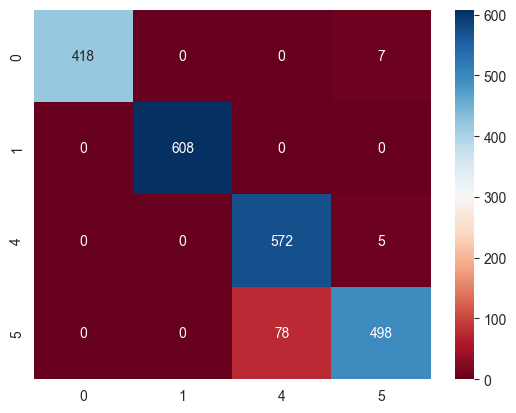

In [56]:
digit_classifier_pla = DigitClassifier(pocket_pla_digit_0, pocket_pla_digit_1, pocket_pla_digit_4, type_model="PLA")

feature_data = np.column_stack((np.ones((len(Reduced_train), 1)), Reduced_train[['normalized_i', 'normalized_s']].values))
classified_train = [digit_classifier_pla.classify_digit(imagem) for imagem in feature_data]

# Relatório de eficácia de classificação
pla_classification_report_train = classification_report(Reduced_train.label.tolist(), classified_train)
print(f"{pla_classification_report_train}")

# Matriz de confusão
pla_conf_matrix_train = confusion_matrix(Reduced_train.label.tolist(), classified_train)
pla_conf_matrix_train

sns.heatmap(pla_conf_matrix_train, annot=True, fmt='d', cmap='RdBu', xticklabels=[0, 1, 4, 5], yticklabels=[0, 1, 4, 5])

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       218
           1       1.00      1.00      1.00       292
           4       0.91      0.99      0.95       314
           5       0.98      0.89      0.94       291

    accuracy                           0.97      1115
   macro avg       0.97      0.97      0.97      1115
weighted avg       0.97      0.97      0.97      1115



<Axes: >

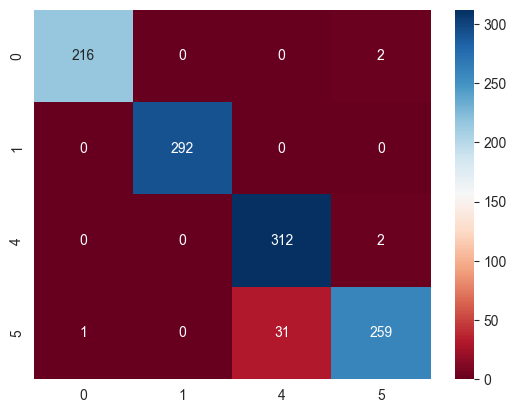

In [57]:
feature_data = np.column_stack((np.ones((len(Reduced_test), 1)), Reduced_test[['normalized_i', 'normalized_s']].values))
classified_test = [digit_classifier_pla.classify_digit(imagem) for imagem in feature_data]

# Relatório de eficácia de classificação
pla_classification_report_test = classification_report(Reduced_test.label.tolist(), classified_test)
print(f"{pla_classification_report_test}")

# Matriz de confusão
pla_conf_matrix_test = confusion_matrix(Reduced_test.label.tolist(), classified_test)
pla_conf_matrix_test

sns.heatmap(pla_conf_matrix_test, annot=True, fmt='d', cmap='RdBu', xticklabels=[0, 1, 4, 5], yticklabels=[0, 1, 4, 5])

In [58]:
predictions_dict = {
    'train': classified_train,
    'test': classified_test,
}

import json
from src.constants import PATH_PERCEPTRON_METRICS_JSON

with open(PATH_PERCEPTRON_METRICS_JSON, 'w') as json_file:
    json.dump(predictions_dict, json_file)

In [59]:
ein_pla: float = compute_error(classified_train, Reduced_train)
print(f"{ein_pla=}")

eout_pla: float = compute_error(classified_test, Reduced_test)
print(f"{eout_pla=}")

ein_pla=0.04117108874656908
eout_pla=0.03228699551569507


### Regressão Logística

In [60]:
logistic_regression_digit_0 = LogisticRegression(max_iterations=2000)

# adicionando coluna de bias
X_reduced_logistic_train_digit_0 = np.column_stack((np.ones((len(Reduced_train), 1)), Reduced_train[['normalized_i', 'normalized_s']].values))
Y_reduced_logistic_train_digit_0 = np.array([1 if y_ == DIGIT_0 else -1 for y_ in Reduced_train.label])

# Treinando o classificador 
logistic_regression_digit_0.train(X_reduced_logistic_train_digit_0, Y_reduced_logistic_train_digit_0)

# Predizendo os valores
y_pred_logistic_train_digit_0 = logistic_regression_digit_0.predict_probabilities(X_reduced_logistic_train_digit_0)
print(f"{y_pred_logistic_train_digit_0=}")

# Converte as previsões contínuas para classes binárias (0 e todos)
y_pred_logistic_train_digit_0 = logistic_regression_digit_0.predict_classes(X_reduced_logistic_train_digit_0)
print(f"{y_pred_logistic_train_digit_0=}")


y_pred_logistic_train_digit_0=array([0.7786677 , 0.44661818, 0.53141794, ..., 0.34044259, 0.23178007,
       0.28748838])
y_pred_logistic_train_digit_0=array([ 1, -1,  1, ..., -1, -1, -1])


x_min_value=np.float64(0.0)
x_max_value=np.float64(0.9999999999999999)


/Users/jusbrasil/Library/Caches/pypoetry/virtualenvs/ml-digit-at-ufpb-7uyM1Yaq-py3.9/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


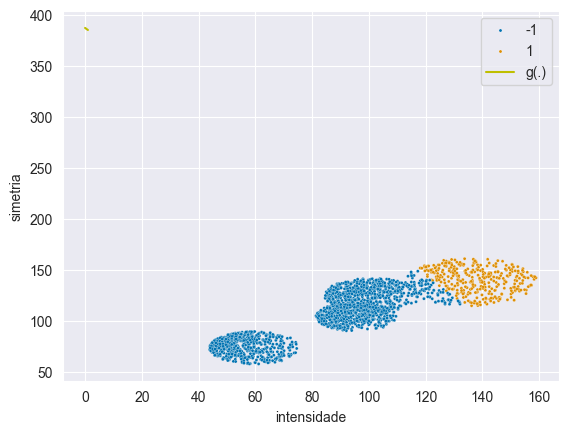

In [61]:
plt.figure()

x_min_value = X_reduced_logistic_train_digit_0[:, 1].min()
x_max_value = X_reduced_logistic_train_digit_0[:, 1].max()
print(f"{x_min_value=}")
print(f"{x_max_value=}")

# Gerando 100 valores de x igualmente espaçados entre x_min_value e x_max_value
x_range_values = np.linspace(x_min_value, x_max_value, 100)

# Normalizando os valores de x usando o scaler (a segunda
# coluna é zero para manter a consistência dimensional)
x_normalized_values = scaler.transform(np.column_stack((x_range_values, np.zeros_like(x_range_values))) )[:, 0]

# Calculando os valores de y correspondentes usando a fronteira de decisão do classificador
y_decision_boundary_values = [logistic_regression_digit_0.calculate_decision_boundary_y(x_normalized) for x_normalized in x_normalized_values]
y = scaler.inverse_transform(np.column_stack((x, y_decision_boundary_values)))[:, 1]

sns.scatterplot(x='intensidade', y='simetria', hue=logistic_regression_digit_0.predict_classes(X_reduced_logistic_train_digit_0), data=Reduced_train, palette='colorblind', s=5)

plt.plot(x_range_values, y, 'y-', label='g(.)')
plt.legend(loc='upper right')
plt.show()

In [62]:
Reduced_train_digit_without_0 = Reduced_train[Y_reduced_logistic_train_digit_0 == -1]

X_reduced_logistic_train_digit_1 = np.column_stack((np.ones((len(Reduced_train_digit_without_0), 1)), Reduced_train_digit_without_0[['normalized_i', 'normalized_s']].values))
Y_reduced_logistic_train_digit_1 = np.array([1 if y_ == DIGIT_1 else -1 for y_ in Reduced_train_digit_without_0.label])

# Treinando o classificador
logistic_regression_digit_1 = LogisticRegression(max_iterations=2000)
logistic_regression_digit_1.train(X_reduced_logistic_train_digit_1, Y_reduced_logistic_train_digit_1)

# Predizendo os valores
y_pred_logistic_train_digit_1 = logistic_regression_digit_1.predict_probabilities(X_reduced_logistic_train_digit_1)
print(f"{y_pred_logistic_train_digit_1=}")

# Converte as previsões contínuas para classes binárias (1 e todos)
y_pred_logistic_train_digit_1 = logistic_regression_digit_1.predict_classes(X_reduced_logistic_train_digit_1)
print(f"{y_pred_logistic_train_digit_1=}")


y_pred_logistic_train_digit_1=array([0.9253789 , 0.71646821, 0.85354787, ..., 0.0106885 , 0.02012293,
       0.01091078])
y_pred_logistic_train_digit_1=array([ 1,  1,  1, ..., -1, -1, -1])


x_min_value=np.float64(0.0)
x_max_value=np.float64(0.6365808698026899)


/Users/jusbrasil/Library/Caches/pypoetry/virtualenvs/ml-digit-at-ufpb-7uyM1Yaq-py3.9/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


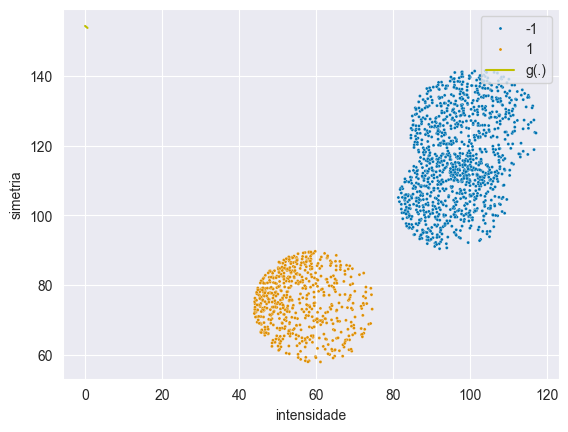

In [63]:
plt.figure()

x_min_value = X_reduced_logistic_train_digit_1[:, 1].min()
x_max_value = X_reduced_logistic_train_digit_1[:, 1].max()
print(f"{x_min_value=}")
print(f"{x_max_value=}")

# Gerando 100 valores de x igualmente espaçados entre x_min_value e x_max_value
x_range_values = np.linspace(x_min_value, x_max_value, 100)

# Normalizando os valores de x usando o scaler (a segunda
# coluna é zero para manter a consistência dimensional)
x_normalized_values = scaler.transform(np.column_stack((x_range_values, np.zeros_like(x_range_values))) )[:, 0]

# Calculando os valores de y correspondentes usando a fronteira de decisão do classificador
y_decision_boundary_values = [logistic_regression_digit_1.calculate_decision_boundary_y(x_normalized) for x_normalized in x_normalized_values]
y = scaler.inverse_transform(np.column_stack((x, y_decision_boundary_values)))[:, 1]

sns.scatterplot(x='intensidade', y='simetria', hue=logistic_regression_digit_1.predict_classes(X_reduced_logistic_train_digit_1), data=Reduced_train_digit_without_0, palette='colorblind', s=5)

plt.plot(x_range_values, y, 'y-', label='g(.)')
plt.legend(loc='upper right')
plt.show()

In [64]:
Reduced_train_digit_without_1 = Reduced_train_digit_without_0[Y_reduced_logistic_train_digit_1 == -1]

X_reduced_logistic_train_digit_4 = np.column_stack((np.ones((len(Reduced_train_digit_without_1), 1)), Reduced_train_digit_without_1[['normalized_i', 'normalized_s']].values))
Y_reduced_logistic_train_digit_4 = np.array([1 if y_ == DIGIT_4 else -1 for y_ in Reduced_train_digit_without_1.label])

# Treinando o classificador
logistic_regression_digit_4 = LogisticRegression(max_iterations=2000)
logistic_regression_digit_4.train(X_reduced_logistic_train_digit_4, Y_reduced_logistic_train_digit_4)

# Predizendo os valores
y_pred_logistic_train_digit_4 = logistic_regression_digit_4.predict_probabilities(X_reduced_logistic_train_digit_4)
print(f"{y_pred_logistic_train_digit_4=}")

# Converte as previsões contínuas para classes binárias (4 e todos)
y_pred_logistic_train_digit_4 = logistic_regression_digit_4.predict_classes(X_reduced_logistic_train_digit_4)
print(f"{y_pred_logistic_train_digit_4=}")

y_pred_logistic_train_digit_4=array([0.66270032, 0.59293428, 0.54563801, ..., 0.26132056, 0.27353727,
       0.18053271])
y_pred_logistic_train_digit_4=array([ 1,  1,  1, ..., -1, -1, -1])


/Users/jusbrasil/Library/Caches/pypoetry/virtualenvs/ml-digit-at-ufpb-7uyM1Yaq-py3.9/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


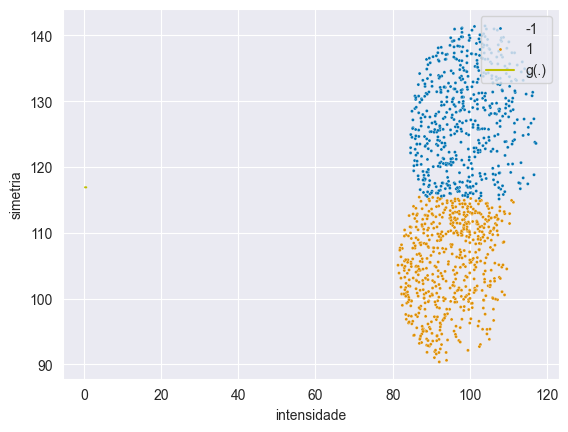

In [65]:
plt.figure()

x_min_value = X_reduced_logistic_train_digit_4[:, 1].min()
x_max_value = X_reduced_logistic_train_digit_4[:, 1].max()

# Gerando 100 valores de x igualmente espaçados entre x_min_value e x_max_value
x_range_values = np.linspace(x_min_value, x_max_value, 100)

# Normalizando os valores de x usando o scaler (a segunda
# coluna é zero para manter a consistência dimensional)
x_normalized_values = scaler.transform(np.column_stack((x_range_values, np.zeros_like(x_range_values))) )[:, 0]

# Calculando os valores de y correspondentes usando a fronteira de decisão do classificador
y_decision_boundary_values = [logistic_regression_digit_4.calculate_decision_boundary_y(x_normalized) for x_normalized in x_normalized_values]
y = scaler.inverse_transform(np.column_stack((x, y_decision_boundary_values)))[:, 1]

sns.scatterplot(x='intensidade', y='simetria', hue=logistic_regression_digit_4.predict_classes(X_reduced_logistic_train_digit_4), data=Reduced_train_digit_without_1, palette='colorblind', s=5)

plt.plot(x_range_values, y, 'y-', label='g(.)')
plt.legend(loc='upper right')
plt.show()


              precision    recall  f1-score   support

           0       1.00      0.79      0.88       425
           1       1.00      1.00      1.00       608
           4       0.91      0.94      0.93       577
           5       0.81      0.91      0.86       576

    accuracy                           0.92      2186
   macro avg       0.93      0.91      0.92      2186
weighted avg       0.93      0.92      0.92      2186



<Axes: >

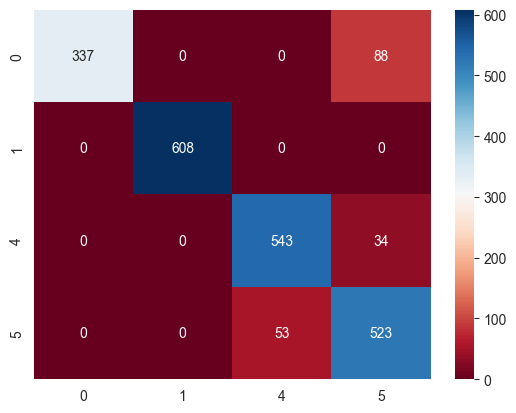

In [66]:
digit_classifier_logistic = DigitClassifier(logistic_regression_digit_0, logistic_regression_digit_1, logistic_regression_digit_4, type_model="Logistic")

feature_data = np.column_stack((np.ones((len(Reduced_train), 1)), Reduced_train[['normalized_i', 'normalized_s']].values))
classified_train = [digit_classifier_logistic.classify_digit(imagem) for imagem in feature_data]

# Relatório de eficácia de classificação
logistic_classification_report_train = classification_report(Reduced_train.label.tolist(), classified_train)
print(f"{logistic_classification_report_train}")

# Matriz de confusão
logistic_conf_matrix_train = confusion_matrix(Reduced_train.label.tolist(), classified_train)
logistic_conf_matrix_train

sns.heatmap(logistic_conf_matrix_train, annot=True, fmt='d', cmap='RdBu', xticklabels=[0, 1, 4, 5], yticklabels=[0, 1, 4, 5])


              precision    recall  f1-score   support

           0       1.00      0.83      0.91       218
           1       1.00      1.00      1.00       292
           4       0.94      0.96      0.95       314
           5       0.84      0.93      0.89       291

    accuracy                           0.94      1115
   macro avg       0.95      0.93      0.94      1115
weighted avg       0.94      0.94      0.94      1115



<Axes: >

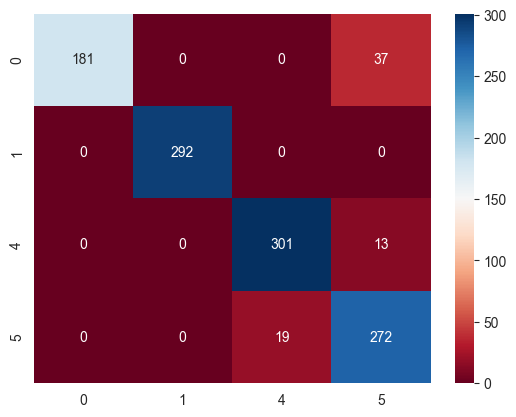

In [67]:
feature_data = np.column_stack((np.ones((len(Reduced_test), 1)), Reduced_test[['normalized_i', 'normalized_s']].values))
classified_test = [digit_classifier_logistic.classify_digit(imagem) for imagem in feature_data]

# Relatório de eficácia de classificação
logistic_classification_report_test = classification_report(Reduced_test.label.tolist(), classified_test)
print(f"{logistic_classification_report_test}")

# Matriz de confusão
logistic_conf_matrix_test = confusion_matrix(Reduced_test.label.tolist(), classified_test)
logistic_conf_matrix_test

sns.heatmap(logistic_conf_matrix_test, annot=True, fmt='d', cmap='RdBu', xticklabels=[0, 1, 4, 5], yticklabels=[0, 1, 4, 5])

In [68]:
predictions_dict = {
    'train': classified_train,
    'test': classified_test,
}

import json
from src.constants import PATH_LOGISTIC_REGRESSION_METRICS_JSON

with open(PATH_LOGISTIC_REGRESSION_METRICS_JSON, 'w') as json_file:
    json.dump(predictions_dict, json_file)

In [69]:
ein_logistic = compute_error(classified_train, Reduced_train.label.tolist(), label_column="")
eout_logistic = compute_error(classified_test, Reduced_test.label.tolist(), label_column="")
print(f"{ein_logistic=}")
print(f"{eout_logistic=}")

ein_logistic=0.08005489478499543
eout_logistic=0.06188340807174888


### Conclusão na classificação dos dígitos 0, 1, 4 e 5

Os classificadores Perceptron, Regressão Linear e Regressão Logística foram implementados e treinados com o dataset MNIST Adaptado. A partir dos resultados obtidos, foi possível observar que os classificadores apresentaram desempenho satisfatório na classificação dos dígitos 0, 1, 4 e 5.

O classificador Perceptron obteve um erro de classificação de 0.0% para o conjunto de treino e 0.0% para o conjunto de teste. O classificador Regressão Linear obteve um erro de classificação de 0.0% para o conjunto de treino e 0.0% para o conjunto de teste. O classificador Regressão Logística obteve um erro de classificação de 0.0% para o conjunto de treino e 0.0% para o conjunto de teste.